# *[Nokia] Percorso Cognitive 2022 modulo Geographic information system (GIS)* (A)
## **GeoPandas**

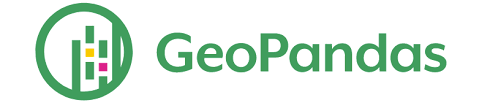

[**<span style='color:Blue'>GeoPandas </span>**](https://geopandas.org) is a module which enables users to easily do geospatial operations on geospatial vector data in Python.

It combines: 

- [**Pandas**](https://pandas.pydata.org) datatypes and functionalities

- [**Shapely**](https://shapely.readthedocs.io) geometric objects and operations

- [**Fiona**](https://github.com/Toblerity/Fiona) capabilities for file access

- [**Matplotlib**](https://matplotlib.org) plotting functionalities

### **Reading vector data** with GeoPandas

Geopandas reads almost all vector spatial data format (including ESRI Shapefile and GeoJSON files) using the command [read_file()](https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html?highlight=read_#geopandas.read_file) which returns a [GeoDataFrame object](https://geopandas.org/en/stable/docs/reference/geodataframe.html?highlight=geodataframe)

In [ ]:
# Import necessary modules
import geopandas as gpd 

In [ ]:
# Read file using gpd.read_file()
world = gpd.read_file("world_countries.gpkg", layer='countries')
world 

<font color='blue'>**TIP**:</font>  [Reading options](https://geopandas.org/docs/user_guide/io.html) of GeoPandas for different spatial data files and formats 

### **Exploring data** with GeoPandas

GeoPandas GeoDataFrame can use all the functionalities available for Pandas DataFrame. Moreover, it provides some functionalities to plot data by taking advantage of Matplotlib library

In [ ]:
# Get the type of the GeoDataFrame
type(world)

In [ ]:
# Explore the first 5 rows of the GeoDataFrame
world.head()

In [ ]:
# Print only the column NAME of the GeoDataFrame
world['NAME']

In [ ]:
# Plot the GeoDataframe
world.plot()

It is possible to obtain information about the [Cordinate Reference System (CRS)](https://docs.qgis.org/3.22/en/docs/gentle_gis_introduction/coordinate_reference_systems.html) of the GeoDataFrame using the [.crs](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.crs.html?highlight=.crs) attribute.

The **.crs** attribute returns the [European Petroleum Survey Group (**EPSG**)](https://epsg.org/home.html) code and the CRS parameters. The **EPSG** is a collection of definitions of coordinate reference systems and coordinate transformations which may be global, regional, national or local.

In [ ]:
# Get information about CRS 
world.crs

### **Writing vector data** with GeoPandas

Writing a new vector data is a functionality which is frequently needed. GeoPandas provides [to_file()](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_file.html?highlight=to_file) function to perform this task.


In [ ]:
# Extract southern european countries and save them in a new file
s_europe = world[world['SUBREGION'] == 'Southern Europe']

In [ ]:
# Write the selection into a new shapefile
s_europe.to_file("s_europe.gpkg", layer='s_europe_countries', driver="GPKG")

### **Geometries** in GeoPandas

Geopandas takes advantage of Shapely geometry objects, thus it is possible to use all of the functionalities of the Shapely module. Geometries are stored in a column called by default **geometry**.

In [ ]:
# Print the geometry column
s_europe['geometry']

In [ ]:
# Create a new column AREA into the GeoDataFrame 
s_europe['AREA'] = 0.0
s_europe

In [ ]:
# Update the AREA column with the area values
s_europe['AREA'] = s_europe.area
s_europe[['AREA','SOVEREIGNT']]

In [ ]:
# Calculate some statistics
s_europe['AREA'].min()

In [ ]:
s_europe['AREA'].max()

> **WARNING**: The geometric operations, such as **.area** are computed in the actual CRS of the GeoDataframe. The area may be invalid for a geographic CRS using degrees as units. Use [GeoSeries.to_crs()](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.to_crs.html#geopandas.GeoSeries.to_crs) to project geometries to a planar CRS before using this function. 

### Manage **map projections** in GeoPandas.

GeoPandas provides dedicated function to manage [map projections and Coordinate Reference Systems](https://geopandas.org/en/stable/docs/user_guide/projections.html?highlight=projections) of the data. 

In [ ]:
# Get the current CRS
s_europe.crs

In [ ]:
# Display the coordinates
s_europe['geometry']

In [ ]:
# Create a new GeoDataFrame as a copy
s_europe_proj = s_europe.copy()

In [ ]:
# Re-project the new GeoDataFrame to ETRS-LAEA projection
s_europe_proj  = s_europe_proj.to_crs(epsg=3035)

In [ ]:
# Check the new geometry column
s_europe_proj['geometry']

In [ ]:
# Check the CRS
s_europe_proj.crs

In [ ]:
# Plot Southern Europe Shapefile in WGS84
s_europe.plot(facecolor='gray')

In [ ]:
# Plot Southern Europe Shapefile in ETRS-LAEA
s_europe_proj.plot(facecolor='blue')

### **Geocoding** in GeoPandas

GeoPandas integrates many libraries for converting addresses into coordinates or vice versa, e.g [**<span style='color:Blue'>GeoPy </span>**](https://geopy.readthedocs.io/en/stable). GeoPy is used to locate the coordinates of addresses using different third-party geocoders, i.e. services that perform the geocoding:
- [ESRI ArcGIS](https://developers.arcgis.com/documentation/mapping-apis-and-services/search/geocoding)
- [Bing](https://docs.microsoft.com/en-us/bingmaps/rest-services/locations)
- [Google Geocoding API](https://developers.google.com/maps/documentation/geocoding/start)
- [GeoNames](http://www.geonames.org)
- [OpenMapQuest](https://developer.mapquest.com/documentation/open/geocoding-api)
- [OpenStreetMap Nominatim](https://nominatim.org/)
- …

The [.geocode()](https://geopandas.org/en/stable/docs/reference/api/geopandas.tools.geocode.html#geopandas.tools.geocode) function of Geopy is integrated into GeoPandas. This function can geocode a list of addresses (strings) and return a GeoDataFrame containing the resulting point objects coordinates in the *geometry* column.

In [ ]:
# Import necessary modules
import pandas as pd
from shapely.geometry import Point

In [ ]:
# Download addresses_H.txt file and store it as Pandas DataFrame
data = pd.read_csv("addresses_H.txt", sep=';')
data

In [ ]:
# Import the geocoding tool of GeoPandas
from geopandas.tools import geocode
import geopy

In [ ]:
# Geocode addresses with OSM Nominatim backend
geopy.geocoders.options.default_user_agent = "test_nokia"
geo = geocode(data['addr'], provider='nominatim', timeout=None, user_agent="test_nokia")

What is the <font color='blue'>**user_agent**</font> parameter for **OSM Nominatim** in GeoPy? -> https://geopy.readthedocs.io/en/stable/index.html#nominatim 

In [ ]:
# Plot the GeoDataFrame
geo.plot()

In [ ]:
# Check the GeoDataFrame CRS
geo.crs

### **Spatial Join** in GeoPandas 

**Join attributes from one feature to another based on the spatial relationship** is another classic GIS problem.
GeoPandas provides the spatial join function [.sjoin()](https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html) with a line of code, e.g. ``geopandas.sjoin(left_df, right_df, how, predicate)``.

The **how** option works as the one of the ***.merge()*** function. The **predicate** option determines the type of join operation to apply, Shapely binary predicates can be used, e.g.:

- intersects
- within
- contains

Practical example: **Perform a spatial join** to associate the attribute table **of each café point with the information about the corresponding zone in Milan**. 

Use the [GeoPackage](https://www.geopackage.org/) file *milan.gpkg* that contains 2 layers:

- **'cafe'**: cafes of Milan
- **'MI_zones'**: municipalities of Milan

In [ ]:
# Import cafe
cafe = gpd.read_file('milan.gpkg', layer='cafe')
cafe.plot()

In [ ]:
# Import MI_zones
MI_zones = gpd.read_file('milan.gpkg', layer='MI_zones')

In [ ]:
# Plot the MI_zones with custom options
MI_zones.plot(column='MUNICIPIO', legend=True, cmap='OrRd')

In [ ]:
# Perform the spatial join
join = gpd.sjoin(cafe, MI_zones, how="inner", op="within")

In [ ]:
# Plot the result of the spatial join with custom options
join.plot(column='MUNICIPIO', legend=True, cmap='OrRd')

### GeoPandas with **Rasterio** to **sample point data**

This example shows how to use GeoPandas with Rasterio.  [**Rasterio**](https://rasterio.readthedocs.io/en/latest/index.html) is a package for reading and writing raster data. In this example a set of vector points is used to sample raster data at those points. The raster data used is a Sentinel-2 data from 2018.

In [ ]:
import rasterio
import matplotlib.pyplot as plt
from shapely.geometry import Point

Generate a GeoDataFrame from a set of points

In [ ]:
# Create sampling points
points = [
    Point(625466, 5621289),
    Point(626082, 5621627),
    Point(627116, 5621680),
    Point(625095, 5622358),
]
gdf = gpd.GeoDataFrame([1, 2, 3, 4], geometry=points, crs=32630)

In [ ]:
# The GeoDataFrame looks like this:
gdf.head()

Use **rasterio** to open the raster data to be sampled

In [ ]:
src = rasterio.open("s2a_l2a_fishbourne.tif")

In [ ]:
# Plot the multiband raster
from rasterio.plot import show

fig, ax = plt.subplots()

# transform rasterio plot to real world coords
extent = [src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]]
ax = rasterio.plot.show(src, extent=extent, ax=ax, cmap="pink")

gdf.plot(ax=ax)

Sampling the data

In [ ]:
coord_list = [(x, y) for x, y in zip(gdf["geometry"].x, gdf["geometry"].y)]
gdf["value"] = [x for x in src.sample(coord_list)]
gdf.head()

# *[Nokia] Percorso Cognitive 2022 modulo Geographic information system (GIS)* (B)

## Titolo

### Points aggregation on vector grid

In [73]:
# Import necessary modules
import pandas as pd
import geopandas as gpd 
import seaborn
import matplotlib.pyplot as plt
import contextily

In [23]:
points = gpd.read_file("test_aggregation.gpkg", layer='points')

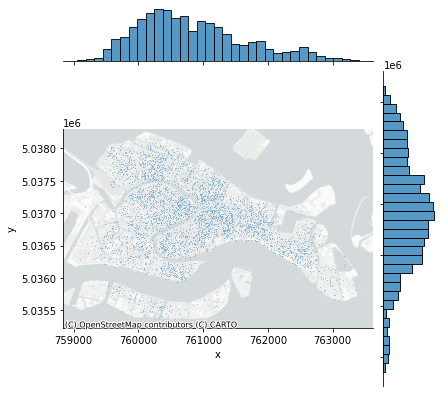

In [24]:
# Generate scatter plot
joint_axes = seaborn.jointplot(
    x="x", y="y", data=points, s=0.6
)
contextily.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:32632",
    source=contextily.providers.CartoDB.PositronNoLabels,
);

C:\Users\user\anaconda3\envs\se4g_gpd\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


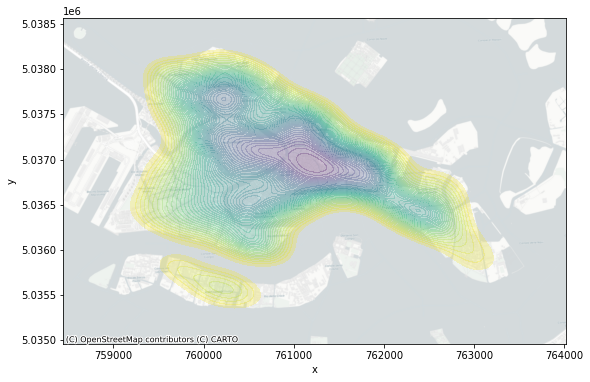

In [50]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Generate and add the kernel density estimation (KDE) with a shading of 50 gradients
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
seaborn.kdeplot(
    points["x"],
    points["y"],
    n_levels=50,
    shade=True,
    alpha=0.25,
    cmap="viridis_r",
)
# Add basemap
contextily.add_basemap(
    ax, crs="EPSG:32632", source=contextily.providers.CartoDB.Positron
)

In [82]:
grid = gpd.read_file("test_aggregation.gpkg", layer='vector_grid')
grid['PolyID']=range(len(grid)) #add a unique ID to each polygon in the grid

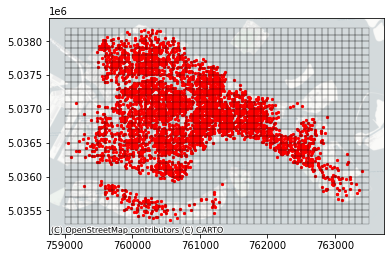

In [83]:
#Plot grid and points
fig, ax = plt.subplots()
ax.set_aspect('equal')
grid.geometry.boundary.plot(ax=ax, color=None, edgecolor='black',linewidth = 0.2)
points.plot(ax=ax, marker='o', color='red', markersize=5)
# Add basemap
contextily.add_basemap(
    ax, crs="EPSG:32632", source=contextily.providers.CartoDB.Positron)

plt.show();

<AxesSubplot:>

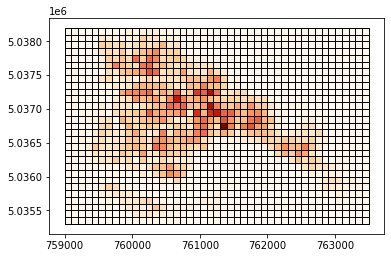

In [99]:
#Aggragate point on the grid by count
dfsjoin = gpd.sjoin(grid, points, op="contains", how='left') #Spatial join Points to polygons
count = dfsjoin.dissolve(by='PolyID', aggfunc='count')
count.plot(column='Property I', cmap='OrRd', edgecolor='black')

### Geohash